In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from task4module.task4module import *
from Task3.task3module.task3module import squares, levenmarq
mpl.style.use('classic')
plt.figure(figsize=(8, 6), dpi = 80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
np.random.seed(42)

In [3]:
x = np.linspace(0, 3, num = 1001)
N = 1001
f = lambda x: 1/(x**2-3*x+2)
y = f(x)
y[np.abs(y) > 100] = 100*np.sign(y[np.abs(y) > 100])
y += np.random.normal(size = N)

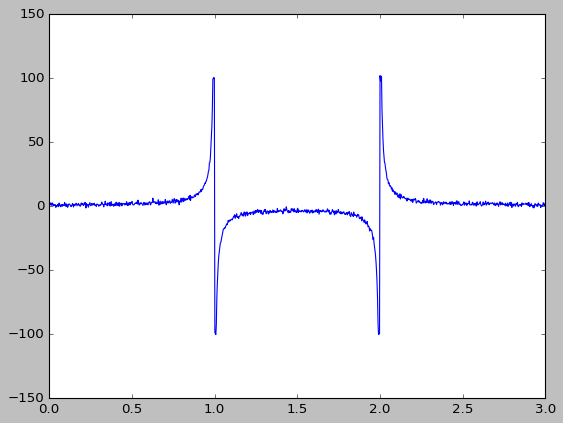

In [4]:
plt.plot(x, y)

In [5]:
def cost_function(a, b, c, d):
    y_pred = (a*x+b)/(x**2+c*x+d)
    return squares(y, y_pred) if -4 < a < 4 and\
                                    -4 < b < 4 and\
                                    -4 < c < 4 and\
                                    -4 < d < 4 else np.infty

def cost_function_v(theta):
    return cost_function(theta[0], theta[1], theta[2], theta[3])

In [6]:
initpopulation = np.random.rand(4, 10)*6-3

In [7]:
initpopulation

array([[-2.81048313,  2.61727348, -2.6881723 ,  0.24777801,  1.25436312,
         2.22581474,  1.28452159,  1.8103685 , -0.96329884,  1.88895068],
       [-2.51931092,  2.36889994,  0.28555426,  1.90378662, -0.28609029,
         0.86146617,  0.15841597,  1.38953713, -2.51022011, -2.6378875 ],
       [-1.5173806 , -2.04273192,  2.2307014 , -1.68471608,  2.85519153,
        -0.97862525, -1.90729251,  1.73819104,  0.95224665, -0.0108257 ],
       [ 0.33218131,  1.31521067, -1.62927155,  2.9780035 ,  2.84875897,
         0.90195412, -1.80274529,  1.08136945, -2.56680955, -2.81608499]])

In [8]:
optimal, val = difevol(cost_function_v, 4, 10, initpopulation = initpopulation, maxiter=1000)
optimal, val

(array([[-1.00994578],
        [ 1.01044657],
        [-2.00095678],
        [ 1.00097334]]),
 array([136442.46723435]))

(-100.0, 100.0)

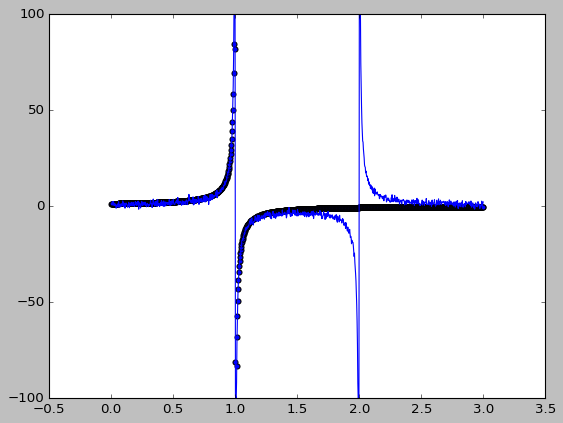

In [9]:
plt.scatter(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [10]:
import pyswarm

In [11]:
ans = pyswarm.pso(cost_function_v, lb = [-4, -4, -4 ,-4], ub = [4, 4, 4, 4], maxiter=10000)
ans

Stopping search: Swarm best position change less than 1e-08


(array([-1.59427224,  1.24573162, -0.6715292 , -0.32912559]),
 199964.14055652157)

(-100.0, 100.0)

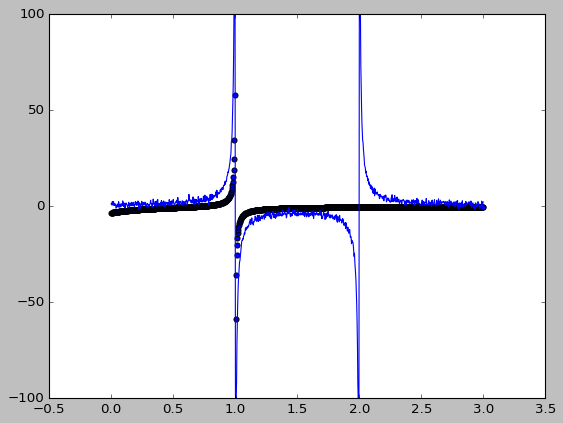

In [12]:
plt.scatter(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [13]:
from scipy.optimize import minimize

In [14]:
nmans = minimize(fun = cost_function_v, x0 = np.array([3.9, 3.9, 3.9, 3.9]), method="Nelder-Mead", bounds=((-4, 4), (-4, 4), (-4, 4), (-4, 4)))
nmans

 final_simplex: (array([[-3.99887987,  1.99527273,  2.92960398,  1.06173979],
       [-3.99802356,  1.99939555,  2.90962531,  1.03026098],
       [-3.99636622,  2.01411609,  2.92611995,  1.0587853 ],
       [-3.99548181,  1.99237916,  2.9134789 ,  1.03575949],
       [-3.99523495,  1.98529669,  2.91174093,  1.03207677]]), array([268011.31386519, 268011.40362209, 268011.42762958, 268011.4830893 ,
       268011.50935329]))
           fun: 268011.3138651869
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 800
           nit: 457
        status: 1
       success: False
             x: array([-3.99887987,  1.99527273,  2.92960398,  1.06173979])

(-100.0, 100.0)

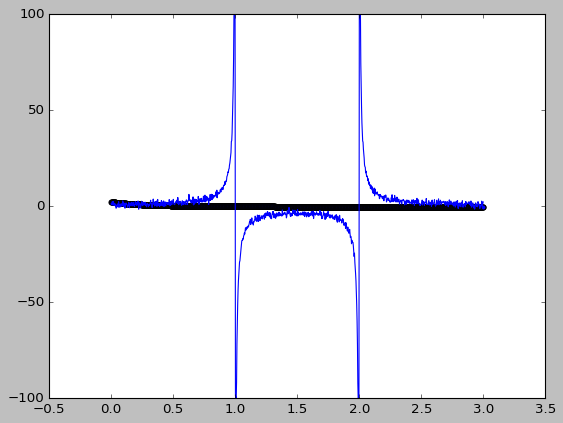

In [15]:
plt.scatter(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [16]:
cost_function_v(np.array([-4, 3.9777, -2.0208, 1.0]))

inf

In [17]:
xlist = np.linspace(-4, 4, 301)
ylist = np.linspace(-4, 4, 301)
X, Y = np.meshgrid(xlist, ylist)

<a list of 33 text.Text objects>

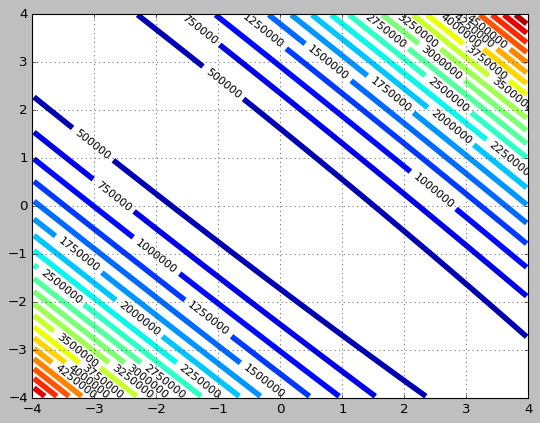

In [18]:
Z = np.array([[cost_function(x, y, -2.0208, 1.055) for x in xlist] for y in ylist])
cp = plt.contour(X, Y, Z, levels = 25, linewidths = 5)
#cp.axes.set_xticks(np.arange(0, 1, 0.05))
#cp.axes.set_yticks(np.arange(0, 1, 0.05))
cp.axes.grid(True)
plt.clabel(cp, inline=True,
          fontsize=10, colors = "black")

In [19]:
import autograd as ag

In [20]:
grad = ag.grad(cost_function_v)

In [21]:
grad(np.array([1., 1., 1., 1.]))

array([ 619.64807353,  396.68501383, -319.60816129, -190.54132302])

In [22]:
hess = ag.hessian(cost_function_v)
hess(np.array([1., 1., 1., 1.]))

array([[ 156.58118272,  152.52250604, -294.91746751, -219.9783054 ],
       [ 152.52250604,  311.38100703, -219.9783054 , -345.692754  ],
       [-294.91746751, -219.9783054 ,  263.22671217,  170.8849597 ],
       [-219.9783054 , -345.692754  ,  170.8849597 ,  322.10071055]])

In [23]:
limits = np.array([[-4., 4.], [-4., 4.], [-4., 4.], [-4., 4.]])
limits

array([[-4.,  4.],
       [-4.,  4.],
       [-4.,  4.],
       [-4.,  4.]])

In [25]:
levenmarq(cost_function_v, limits = limits, x0 = np.array([ 1. ,1. ,0., 1.]), regulpar=1., funchess=hess, funcgrad=grad)

1
2
3


(array([-1.03522382,  3.97574005, -1.34066686,  3.34946731]),
 269610.96830997383,
 {'iterations': 3,
  'funccalcs': 0,
  'gradcalcs': 3,
  'hesscalcs': 3,
  'matrixinversions': 3},
 None)

In [26]:
minimize(cost_function_v, x0 = np.array([ 1. ,1. ,0., 1.]), method="BFGS")

C:\ifmo\AlgoAnalysisDevelopment\venv\Scripts\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 136442.47460095343
 hess_inv: array([[ 8.69307246e-06, -8.69151843e-06, -6.43149355e-08,
         6.39300324e-08],
       [-8.69151843e-06,  8.69004927e-06,  6.40843740e-08,
        -6.36998309e-08],
       [-6.43149355e-08,  6.40843740e-08,  1.74634627e-09,
        -1.74283215e-09],
       [ 6.39300324e-08, -6.36998310e-08, -1.74283215e-09,
         1.73934193e-09]])
      jac: array([  7.01757812,   6.98828125, 567.51953125, 567.14453125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 53
     njev: 119
   status: 2
  success: False
        x: array([-1.00968311,  1.01018384, -2.00095708,  1.00097362])

In [27]:
def residuals(theta):
    y_pred = (theta[0]*x+theta[1])/(x**2+theta[2]*x+theta[3])
    return y_pred - y

In [28]:
from scipy.optimize import least_squares

In [29]:
least_squares(residuals, x0 = np.array([ 1. ,1. ,0., 1.]))

 active_mask: array([0., 0., 0., 0.])
        cost: 68231.58647163594
         fun: array([ 0.02454269,  0.66033437, -0.12480261, ..., -0.4459621 ,
       -1.58667978, -2.41042657])
        grad: array([  5755.90241813,   6434.24141009, 221933.5112064 , 133588.70742078])
         jac: array([[-0.        ,  0.99888001, -0.        , -1.02011304],
       [ 0.00301467,  1.00489694, -0.00308804, -1.02934402],
       [ 0.00606582,  1.01096838, -0.00623212, -1.03868674],
       ...,
       [ 0.75342527,  0.25164505,  0.38621287,  0.12899561],
       [ 0.75191535,  0.25088933,  0.38485969,  0.12841496],
       [ 0.75041112,  0.25013701,  0.38351346,  0.12783779]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 34
        njev: 19
  optimality: 221933.51120640448
      status: 3
     success: True
           x: array([-1.0218555 ,  1.02240191, -2.00110418,  1.00112124])